# **Group C: Python Assessment**
## World University Rankings (2012-2017)

- **Olaide oludare Wasiu** | S4216546
- **Nosakhare Edokpayi** | S4214240
- **Remsha Farooq** | S4218275
- **Uchechukwu Osita Ikwu** | S4216861
- **Yusuf Segun Ajibade** | S4216782



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import re
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# DATA INTEGRATION


**Use the os.listdir() function to get a list of all the files in the folder and then filter the list of files to only include CSV files using a list comprehension.**


The code defines a function called **_get_csv_files()_** that takes a single argument csv_path. The function uses the os module to get a list of all the files in the csv_path directory, filters the list to only include files that end with the .csv extension, and returns the list of CSV files.

After defining the function, we construct the path variable to the directory containing the CSV files by getting the current working directory using **_os.getcwd()_** and appending the **_'/dataset'_** folder.
We then call the **_get_csv_files()_** function with this constructed path variable and assign the returned list of CSV files to the **_csv_files_** variable. Finally, we print the list of CSV files to the output.

_**NOTE**: For this to run correctly, the directory '/dataset' must be in the current working directory and contains and must contain the .csv files_

In [6]:
def get_csv_files(csv_path):

    files = os.listdir(csv_path)

    csv_files = [file for file in files if file.endswith('.csv')]

    return csv_files

dataset_dir = os.getcwd() + '\\dataset'

csv_files = get_csv_files(dataset_dir)

print(csv_files)
print(dataset_dir)

['cwurData_2012.csv', 'cwurData_2013.csv', 'cwurData_2014.csv', 'cwurData_2015.csv', 'cwurData_2016.csv', 'cwurData_2017.csv']
c:\Users\s4214240\OneDrive - University of Gloucestershire\Document\Data Science\CT7201\ASSESSMENT\Submission\dataset


### Import csv files

The purpose of this function is to read a CSV file, extract the year from its file name, and add a new 'year' column to the DataFrame with the extracted year value. It can be useful when working with multiple CSV files where the year is encoded in the file names.

In [7]:
def import_with_year_column(csv_file):
    
    file_basename = os.path.basename(csv_file)
    year = file_basename[9:13]
    
    df = pd.read_csv(csv_file)
    df['year'] = year

    return df


### Merge dataframes

merge_df_rows function is used to takes a list of CSV file paths as input and return a merged Pandas DataFrame. The code outside the function calls merge_df_rows on a list of CSV file paths (csv_files_path) and assigns the resulting merged DataFrame to df. The df_merged variable is assigned the same DataFrame for further use.

In [8]:
def merge_df_rows(csv_paths):
    
    ref_df = import_with_year_column(csv_paths[0])
    ref_colnames = ref_df.columns.to_list()

    not_compatible = []
        
    for i in range(1, len(csv_paths)):
        csv_file = csv_paths[i]
        current_df = import_with_year_column(csv_file)
        current_colnames = current_df.columns.tolist()
        
        if current_colnames == ref_colnames:
            ref_df = pd.concat([ref_df, current_df], ignore_index=True)
        else:
            not_compatible.append(csv_file)
           
    if not_compatible:
        print(f"This list of file(s) is not compatible: {not_compatible}")
    else:
        print("All csv files are compatible, and have been merged!")
    
    return ref_df


csv_files_path = [dataset_dir + '\\' + csv_file for csv_file in csv_files]

df = merge_df_rows(csv_files_path)

df_merged = df


All csv files are compatible, and have been merged!


In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            5200 non-null   object 
 1   Institution           4200 non-null   object 
 2   Location              4200 non-null   object 
 3   National Rank         4200 non-null   float64
 4   Quality of Education  4200 non-null   object 
 5   Alumni Employment     4200 non-null   object 
 6   Quality of Faculty    4200 non-null   object 
 7   Publications          4200 non-null   object 
 8   Influence             4200 non-null   object 
 9   Citations             4200 non-null   object 
 10  Broad Impact          4000 non-null   float64
 11  Patents               4200 non-null   object 
 12  Score                 4200 non-null   float64
 13  year                  5200 non-null   object 
dtypes: float64(3), object(11)
memory usage: 568.9+ KB


,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Publications,Influence,Citations,Broad Impact,Patents,Score,year
0,1,Harvard University,USA,1.0,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2.0,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3.0,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1.0,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4.0,2,29,7,37,22,22,NaN,18,85.21,2012


# DATA CLEANING

## Rename columns

Tasks include:

- rename columns
- convert spaces to underscores
- change to lowercase

In [10]:
# get column names
df.columns.to_list()

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Quality of Education',
 'Alumni Employment',
 'Quality of Faculty',
 'Publications',
 'Influence',
 'Citations',
 'Broad Impact',
 'Patents',
 'Score',
 'year']

Next we will rename and format the columns of a DataFrame based on a provided mapping, replacing whitespace characters with underscores and converting the column names to lowercase.

In [11]:
def rename_columns(df, colname_dict):
    df = df.rename(columns=colname_dict)
    return df


colnames_map = {
    'Location': 'country',
    'Quality of Education': 'education quality',
    'Quality of Faculty': 'faculty quality'
    }


df = rename_columns(df_merged, colnames_map)

df.columns = df.columns.str.replace('\s+', '_', regex=True)

df.columns = df.columns.str.lower()

df_renamed = df

view changes

In [12]:
print(df_renamed.columns.to_list())
print(df_renamed.info())


['world_rank', 'institution', 'country', 'national_rank', 'education_quality', 'alumni_employment', 'faculty_quality', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score', 'year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   world_rank         5200 non-null   object 
 1   institution        4200 non-null   object 
 2   country            4200 non-null   object 
 3   national_rank      4200 non-null   float64
 4   education_quality  4200 non-null   object 
 5   alumni_employment  4200 non-null   object 
 6   faculty_quality    4200 non-null   object 
 7   publications       4200 non-null   object 
 8   influence          4200 non-null   object 
 9   citations          4200 non-null   object 
 10  broad_impact       4000 non-null   float64
 11  patents            4200 non-null   object 
 12  score      

## Rearrange column positions

The iloc attribute is used to slice the DataFrame by integer position.
- The first argument, : means to select all rows.
- The second argument is a list of integer positions representing the desired order of the columns.
Here, the list [12, 1, 2, 0, *range(3,11)] specifies that the thirteenth column (iloc[:, 12]) should come first, followed by the second column (iloc[:, 1]), the third column (iloc[:, 2]), the first column (iloc[:, 0]), and then columns 4 to 10 (iloc[:, 3:11]).

In [13]:
df_sorted_cols = df_renamed.iloc[:, [13, 1, 2, 0, *range(3,13)]] 

df_sorted_cols.info()
df_sorted_cols.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               5200 non-null   object 
 1   institution        4200 non-null   object 
 2   country            4200 non-null   object 
 3   world_rank         5200 non-null   object 
 4   national_rank      4200 non-null   float64
 5   education_quality  4200 non-null   object 
 6   alumni_employment  4200 non-null   object 
 7   faculty_quality    4200 non-null   object 
 8   publications       4200 non-null   object 
 9   influence          4200 non-null   object 
 10  citations          4200 non-null   object 
 11  broad_impact       4000 non-null   float64
 12  patents            4200 non-null   object 
 13  score              4200 non-null   float64
dtypes: float64(3), object(11)
memory usage: 568.9+ KB


,year,institution,country,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
0,2012,Harvard University,USA,1,1.0,7,9,1,1,1,1,NaN,5,100.00
1,2012,Massachusetts Institute of Technology,USA,2,2.0,9,17,3,12,4,4,NaN,1,91.67
2,2012,Stanford University,USA,3,3.0,17,11,5,4,2,2,NaN,15,89.50
3,2012,University of Cambridge,United Kingdom,4,1.0,10,24,4,16,16,11,NaN,50,86.17
4,2012,California Institute of Technology,USA,5,4.0,2,29,7,37,22,22,NaN,18,85.21


## Missing Values

In [14]:
df = df_sorted_cols

print('Column count ', df.isna().sum())

# get rows with missing values
df_null_rows = df[df.isnull().any(axis=1)]

df_null_rows


Column count  year                    0
institution          1000
country              1000
world_rank              0
national_rank        1000
education_quality    1000
alumni_employment    1000
faculty_quality      1000
publications         1000
influence            1000
citations            1000
broad_impact         1200
patents              1000
score                1000
dtype: int64


,year,institution,country,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
0,2012,Harvard University,USA,1,1.0,7,9,1,1,1,1,NaN,5,100.00
1,2012,Massachusetts Institute of Technology,USA,2,2.0,9,17,3,12,4,4,NaN,1,91.67
2,2012,Stanford University,USA,3,3.0,17,11,5,4,2,2,NaN,15,89.50
3,2012,University of Cambridge,United Kingdom,4,1.0,10,24,4,16,16,11,NaN,50,86.17
4,2012,California Institute of Technology,USA,5,4.0,2,29,7,37,22,22,NaN,18,85.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2017,NaN,NaN,Top 3.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5193,2017,NaN,NaN,Top 3.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5195,2017,NaN,NaN,Top 3.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197,2017,NaN,NaN,Top 3.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorize the missing data by the 'year' column

In [15]:
# get unique values of 'year' column in the missing data
df_null_rows['year'].unique().tolist()

['2012', '2013', '2017']

### inspect data of each missing year 

In [16]:
data_2012 = df[df['year'] == '2012']

print(f"Missing value count, Year 2012: \n{data_2012.isna().sum()}\n")

Missing value count, Year 2012: 
year                   0
institution            0
country                0
world_rank             0
national_rank          0
education_quality      0
alumni_employment      0
faculty_quality        0
publications           0
influence              0
citations              0
broad_impact         100
patents                0
score                  0
dtype: int64



from the above we, see that the all columns except from the 'broad_impact' column have complete column. All the observation in the dataset have missing the broad_impact variable value.

In [17]:
data_2013 = df[df['year'] == '2013']

print(f"Missing value count, Year 2013: \n{data_2013.isna().sum()}\n")

Missing value count, Year 2013: 
year                   0
institution            0
country                0
world_rank             0
national_rank          0
education_quality      0
alumni_employment      0
faculty_quality        0
publications           0
influence              0
citations              0
broad_impact         100
patents                0
score                  0
dtype: int64



from the above, the case of the 2013 data subset is the same as that of the year '2012'. All observations in the dataset are missing the broad_impact variable value.

In [18]:
data_2017 = df[df['year'] == '2017']

print(f"Missing value count, Year 2017: \n{data_2017.isna().sum()}\n")

Missing value count, Year 2017: 
year                    0
institution          1000
country              1000
world_rank              0
national_rank        1000
education_quality    1000
alumni_employment    1000
faculty_quality      1000
publications         1000
influence            1000
citations            1000
broad_impact         1000
patents              1000
score                1000
dtype: int64



From the code above we find the misssing values in the 2017 data subset is a much different case from that of the year '2012' and '2013'. The data frame has 1000 rows with missing values from a total of 2000 observation.

On closer look, we see that the missing values are as a result of the data source generating a row below each observation, with the 'world_rank' column value of the generated row corresponding to the institution's percentage position in rank. As a result, we see when we run _df.info()_ that the 'world_rank' and 'year' column have no _null_ values while the other columns have 1000 _null_ values.

So for this subset, We will drop all null rows.

### Clean missing data

- Year '2017'

In [19]:

def drop_df_rows(df, rows):
      
    # Drop the rows with missing values
    df = df.drop(rows.index)

    # Print a message if any rows were dropped
    if len(rows) > 0:
        print(f"Dropped {len(rows)} rows with missing values.")
    
    return df



df_rows_to_drop = data_2017[data_2017.isnull().any(axis=1)]

# Drop the rows with missing values
df_cleaned_2017 = drop_df_rows(df, df_rows_to_drop)


Dropped 1000 rows with missing values.


Check to see there that are no more nulls for the year '2017':

In [20]:
df_cleaned_2017[df_cleaned_2017['year'] == '2017'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3200 to 5198
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1000 non-null   object 
 1   institution        1000 non-null   object 
 2   country            1000 non-null   object 
 3   world_rank         1000 non-null   object 
 4   national_rank      1000 non-null   float64
 5   education_quality  1000 non-null   object 
 6   alumni_employment  1000 non-null   object 
 7   faculty_quality    1000 non-null   object 
 8   publications       1000 non-null   object 
 9   influence          1000 non-null   object 
 10  citations          1000 non-null   object 
 11  broad_impact       1000 non-null   float64
 12  patents            1000 non-null   object 
 13  score              1000 non-null   float64
dtypes: float64(3), object(11)
memory usage: 117.2+ KB


- ##### Year '2012' and '2013'

To determine cleaning approach, we first find out how many the percentage of missing data in 'broad_impact' column.

In [21]:
df = df_cleaned_2017

null_percentage = df['broad_impact'].isnull().sum() / len(df) * 100

round(null_percentage)

5

We see that just about 5% of data is missing from broad impact column (200 out of 4200 observation). Removing the column will result in loss of significant amounts of data.

We will therefore fill in the missing data with the mean of the existing data as follows:

- broad_impact of each institution in year '2012': institution's rank in year '2014'
- broad_impact of each institution in year '2013': mean of the institution's rank in year '2014' & '2015'

_Note: Institutions present in '2012' and '2013' but not present in '2014', or '2014' and  '2015' respectively will not have a value to use._


In [22]:
# df.info()

df['institution']

0                          Harvard University
1       Massachusetts Institute of Technology
2                         Stanford University
3                     University of Cambridge
4          California Institute of Technology
                        ...                  
5190                      Nanchang University
5192          China Pharmaceutical University
5194              Federal University of Ceará
5196            Chung Shan Medical University
5198                      University of Macau
Name: institution, Length: 4200, dtype: object


What we do next is to 'broad_impact' column of the DataFrame based on specific conditions and values from other columns, specifically for the years 2012 and 2013. 


In [23]:
institutions_2012 = df[df['year'] == '2012']['institution'].tolist()

for institution in institutions_2012:
    row_2014 = df[(df['institution'] == institution) & (df['year'] == '2014')]
    
    if len(row_2014) == 0:
        broad_impact_rank = 0
    else:
        broad_impact_rank = row_2014['broad_impact'].values[0]
    
    df.loc[(df['institution'] == institution) & (df['year'] == '2012'), 'broad_impact'] = broad_impact_rank



institution_2013 = df[df['year'] == '2013']['institution'].tolist()

for institution in institution_2013:
    row_2014 = df[(df['institution'] == institution) & (df['year'] == '2014')]
    row_2015 = df[(df['institution'] == institution) & (df['year'] == '2015')]
    
    if len(row_2014) & len(row_2015) == 0:
        broad_impact_rank = 0
    else:
        broad_impact_rank = np.mean([row_2014['broad_impact'].values[0], row_2015['broad_impact'].values[0]])
    
    df.loc[(df['institution'] == institution) & (df['year'] == '2013'), 'broad_impact'] = broad_impact_rank


df_cleaned = df
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 0 to 5198
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               4200 non-null   object 
 1   institution        4200 non-null   object 
 2   country            4200 non-null   object 
 3   world_rank         4200 non-null   object 
 4   national_rank      4200 non-null   float64
 5   education_quality  4200 non-null   object 
 6   alumni_employment  4200 non-null   object 
 7   faculty_quality    4200 non-null   object 
 8   publications       4200 non-null   object 
 9   influence          4200 non-null   object 
 10  citations          4200 non-null   object 
 11  broad_impact       4200 non-null   float64
 12  patents            4200 non-null   object 
 13  score              4200 non-null   float64
dtypes: float64(3), object(11)
memory usage: 492.2+ KB


# Duplicates


### Check for duplicates

We are interested in finding duplicates in just the year colummn. 
To do this we have to first group the data by the 'year' columns, and then check for the duplicate institutions within each group. This is because instiitutions can appear repeatedly accross different years, but ought not to appear more than once in the same year.

We won't check for duplicates in the ranck columns because we cannot eliminate the possibilty of two different schools having the same rank in the different columns.

First find the unique years

In [24]:
df = df_cleaned


# get unique values of 'year' column in data
years = df['year'].unique().tolist()

# empty dataframe
duplicate_rows = pd.DataFrame()

# iterate over each year:
for year in years:

    # check for duplicate in current year and assign to duplicates
    duplicates = df[df['year'] == year].duplicated(subset=['institution'])

    #  subset the main DataFrame by the duplicates and append to the duplicate_rows DataFrame
    duplicate_rows = pd.concat([duplicate_rows, df[(df['year'] == year) & duplicates]])


# display the duplicate rows
print(duplicate_rows)


df_cleaned = df



Empty DataFrame
Columns: [year, institution, country, world_rank, national_rank, education_quality, alumni_employment, faculty_quality, publications, influence, citations, broad_impact, patents, score]
Index: []


The resulting duplicate_rows is an empty data frame, which means there are no duplicate data in the dataset.


### Convert datatype of all rank columns

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 0 to 5198
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               4200 non-null   object 
 1   institution        4200 non-null   object 
 2   country            4200 non-null   object 
 3   world_rank         4200 non-null   object 
 4   national_rank      4200 non-null   float64
 5   education_quality  4200 non-null   object 
 6   alumni_employment  4200 non-null   object 
 7   faculty_quality    4200 non-null   object 
 8   publications       4200 non-null   object 
 9   influence          4200 non-null   object 
 10  citations          4200 non-null   object 
 11  broad_impact       4200 non-null   float64
 12  patents            4200 non-null   object 
 13  score              4200 non-null   float64
dtypes: float64(3), object(11)
memory usage: 621.2+ KB


In [26]:


def convert_columns_to_int(df, column_list):
    
    # loop over columns in cols_to_check_list

    for col in column_list:

        if df[col].str.contains('[^\d.]', regex=True).any():
            
            df[col] = df[col].astype(str).apply(lambda x: re.sub(r'[^\d.]', '', x))
        
        # first convert columns to float and round up
        df[col] = round(df[col].astype(float))

        # convert to integer for appropriate rank data types
        df[col] = df[col].astype(int)
    
    return df



In [27]:
df = df_cleaned

cols_to_convert = df.columns[3:13]

df[cols_to_convert] = df[cols_to_convert].astype(str)

df = convert_columns_to_int(df, cols_to_convert)

df['score'] = df['score'].astype(float)


print(df.tail())

df_converted_type = df



      year                      institution country  world_rank  \
5190  2017              Nanchang University   China         996   
5192  2017  China Pharmaceutical University   China         997   
5194  2017      Federal University of Ceará  Brazil         998   
5196  2017    Chung Shan Medical University  Taiwan         999   
5198  2017              University of Macau   Macau        1000   

      national_rank  education_quality  alumni_employment  faculty_quality  \
5190             96                383                538              240   
5192             97                383                578              240   
5194             18                383                604              240   
5196             20                383                616              240   
5198              1                383                333              240   

      publications  influence  citations  broad_impact  patents  score  
5190           747        961        853           974 

### check data types

In [28]:
df_converted_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 0 to 5198
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               4200 non-null   object 
 1   institution        4200 non-null   object 
 2   country            4200 non-null   object 
 3   world_rank         4200 non-null   int32  
 4   national_rank      4200 non-null   int32  
 5   education_quality  4200 non-null   int32  
 6   alumni_employment  4200 non-null   int32  
 7   faculty_quality    4200 non-null   int32  
 8   publications       4200 non-null   int32  
 9   influence          4200 non-null   int32  
 10  citations          4200 non-null   int32  
 11  broad_impact       4200 non-null   int32  
 12  patents            4200 non-null   int32  
 13  score              4200 non-null   float64
dtypes: float64(1), int32(10), object(3)
memory usage: 457.2+ KB


In [29]:
df_converted_types = df
df.to_csv('cwur_cleaned.csv', index=False)

# DATA EXPLORATION

In [30]:
df.head() # view top ten columns of the dataset

,year,institution,country,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
0,2012,Harvard University,USA,1,1,7,9,1,1,1,1,1,5,100.00
1,2012,Massachusetts Institute of Technology,USA,2,2,9,17,3,12,4,4,2,1,91.67
2,2012,Stanford University,USA,3,3,17,11,5,4,2,2,4,15,89.50
3,2012,University of Cambridge,United Kingdom,4,1,10,24,4,16,16,11,13,50,86.17
4,2012,California Institute of Technology,USA,5,4,2,29,7,37,22,22,24,18,85.21


In [31]:
#Describe everything related to data the missing values etc
df.describe()

,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
count,4200.000000,4200.00000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,479.071429,41.17000,290.908333,388.120952,193.387857,479.199286,479.105476,434.062143,476.539048,461.612619,46.971974
std,297.673394,51.95526,119.549109,196.240848,64.223619,297.331704,297.019046,261.776611,294.660955,278.613474,7.166412
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,42.490000
25%,213.000000,6.00000,213.000000,213.000000,210.000000,213.000000,213.000000,200.000000,214.000000,208.000000,44.290000
50%,475.500000,22.00000,355.000000,475.500000,218.000000,475.000000,475.500000,428.000000,470.000000,471.000000,44.790000
75%,738.000000,51.00000,378.000000,567.000000,235.000000,738.000000,738.000000,645.000000,732.000000,735.000000,46.792500
max,1000.000000,229.00000,383.000000,616.000000,240.000000,1000.000000,995.000000,853.000000,1000.000000,913.000000,100.000000


# Correlation Analysis

 By calculating correlations, we can determine the degree and direction of the linear relationship between two variables. This  is crucial in understanding the interdependencies among the variables in the university rankings.


In [32]:
# Compute the correlation matrix
corr_matrix = df.corr()
corr_matrix

,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
world_rank,1.000000,0.237922,0.634328,0.628903,0.624987,0.917051,0.892886,0.844404,0.953251,0.683373,-0.549153
national_rank,0.237922,1.000000,0.185202,0.105340,0.196447,0.326194,0.162087,0.195158,0.220077,0.109033,-0.190931
education_quality,0.634328,0.185202,1.000000,0.557221,0.749131,0.576274,0.607420,0.582627,0.574373,0.478902,-0.596793
alumni_employment,0.628903,0.105340,0.557221,1.000000,0.500580,0.531900,0.478083,0.505396,0.489562,0.483419,-0.494131
faculty_quality,0.624987,0.196447,0.749131,0.500580,1.000000,0.590792,0.622401,0.612146,0.601789,0.513495,-0.695572
publications,0.917051,0.326194,0.576274,0.531900,0.590792,1.000000,0.862680,0.810527,0.926303,0.656395,-0.519970
influence,0.892886,0.162087,0.607420,0.478083,0.622401,0.862680,1.000000,0.828092,0.923610,0.605940,-0.522328
citations,0.844404,0.195158,0.582627,0.505396,0.612146,0.810527,0.828092,1.000000,0.866810,0.583224,-0.518988
broad_impact,0.953251,0.220077,0.574373,0.489562,0.601789,0.926303,0.923610,0.866810,1.000000,0.633560,-0.527058
patents,0.683373,0.109033,0.478902,0.483419,0.513495,0.656395,0.605940,0.583224,0.633560,1.000000,-0.471046


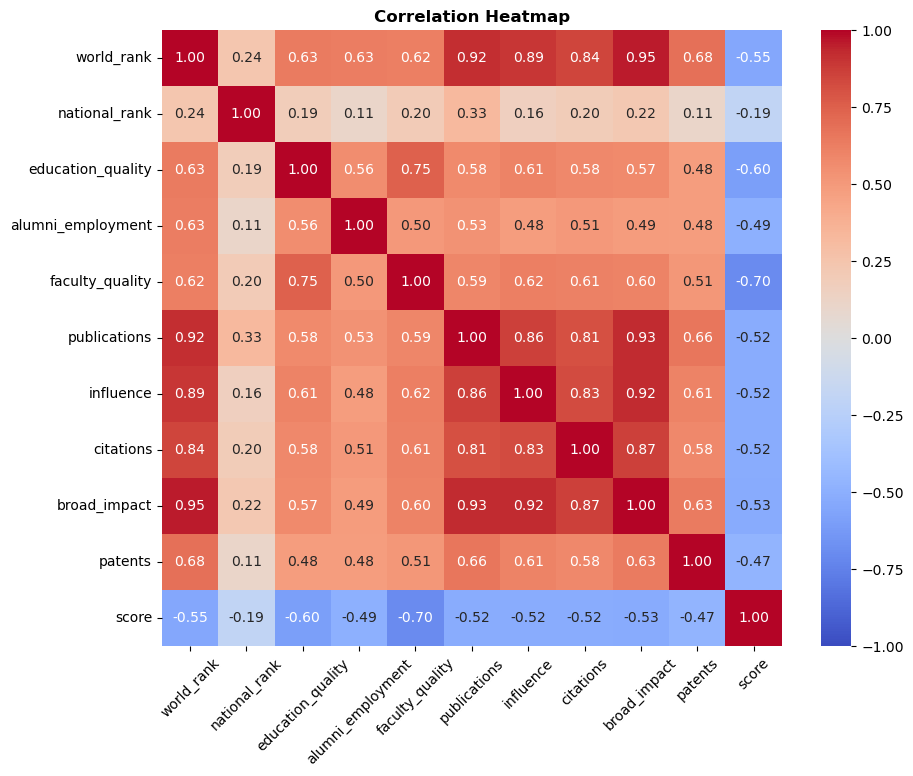

In [33]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.title('Correlation Heatmap', fontsize=12, fontweight='bold')

# Adjust the xtick rotation
plt.xticks(rotation=45)

plt.show()

### Strong Correlations

In [34]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Get the absolute correlation matrix
corr_matrix_abs = corr_matrix.abs()


# Set a threshold for strong correlation
strong_correlation_threshold = 0.8

# Find variables with strong correlations
strong_correlation_columns = {}

for i in range(len(corr_matrix.columns)):
    correlations = corr_matrix_abs.iloc[i, :]
    strong_correlations = correlations[correlations >= strong_correlation_threshold]
    if len(strong_correlations) > 1:
        strong_correlation_columns[corr_matrix.columns[i]] = correlations

print('The strong correlation variables are:')        
for columns in strong_correlation_columns:
    print(f"    {columns}")

    
print()

# Print the variables with strong correlations
print("Correlations: with other varables")
for key, value in strong_correlation_columns.items():
    print(f"{key}:")
    for index, value in value.items():
        print(f"   {index}: {value:.2f}")

The strong correlation variables are:
    world_rank
    publications
    influence
    citations
    broad_impact

Correlations: with other varables
world_rank:
   world_rank: 1.00
   national_rank: 0.24
   education_quality: 0.63
   alumni_employment: 0.63
   faculty_quality: 0.62
   publications: 0.92
   influence: 0.89
   citations: 0.84
   broad_impact: 0.95
   patents: 0.68
   score: 0.55
publications:
   world_rank: 0.92
   national_rank: 0.33
   education_quality: 0.58
   alumni_employment: 0.53
   faculty_quality: 0.59
   publications: 1.00
   influence: 0.86
   citations: 0.81
   broad_impact: 0.93
   patents: 0.66
   score: 0.52
influence:
   world_rank: 0.89
   national_rank: 0.16
   education_quality: 0.61
   alumni_employment: 0.48
   faculty_quality: 0.62
   publications: 0.86
   influence: 1.00
   citations: 0.83
   broad_impact: 0.92
   patents: 0.61
   score: 0.52
citations:
   world_rank: 0.84
   national_rank: 0.20
   education_quality: 0.58
   alumni_employment: 0.

From the resulting output we observe the following:

The **"world_rank"** variable shows strong positive correlations with **publications (0.92), **influence (0.89), citations (0.84), broad_impact (0.95), and patents (0.68)**. Universities with higher world rankings tend to have higher scores in these areas, suggesting their overall excellence.

The **publications** variable exhibits strong positive correlations with **world_rank (0.92), influence (0.86), citations (0.81), broad_impact (0.93), and patents (0.66)**. Universities with a higher number of publications tend to perform well in other areas, indicating their research productivity.

The **influence** variable demonstrates strong positive correlations with **world_rank (0.89), publications (0.86), citations (0.83), broad_impact (0.92), and patents (0.61)**. Universities with higher influence scores tend to have higher rankings and greater impact in various domains.

The **citations** variable exhibits a strong positive correlation with **world_rank (0.84), publications (0.81), influence (0.83), broad_impact (0.87), and patents (0.58)**. Universities with higher citation scores tend to have higher rankings and greater recognition for their research output.

The **broad_impact** variable shows a strong positive correlation with **world_rank (0.95), publications (0.93), influence (0.92), citations (0.87), and patents (0.63)**. Universities with higher broad impact scores tend to have higher rankings and significant contributions across different areas.


### Visualise correlations using a heatmap

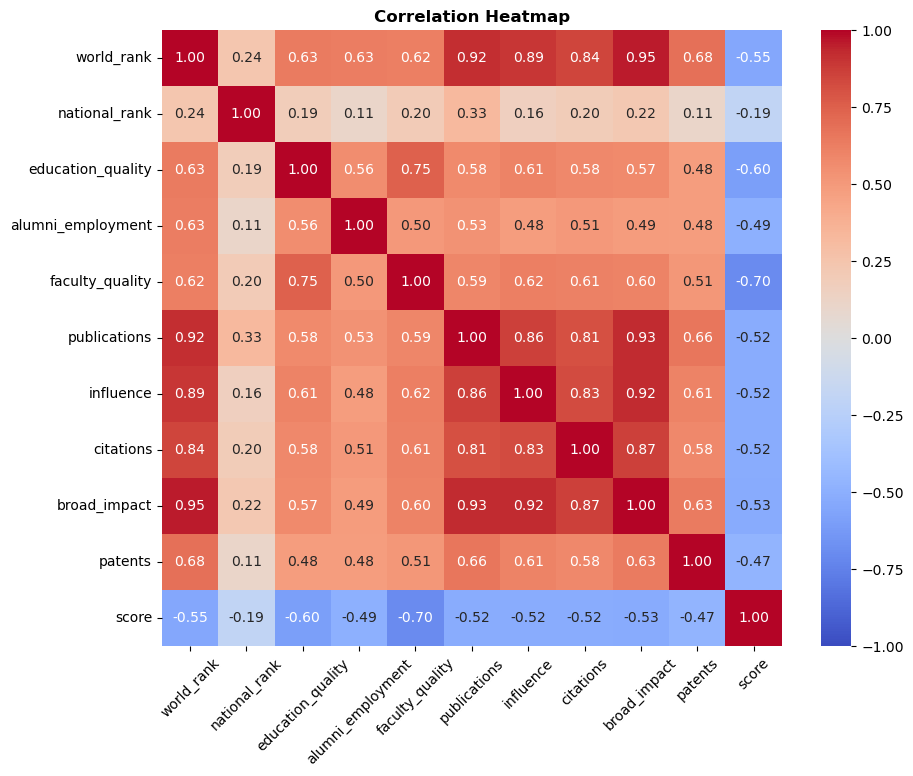

In [35]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.title('Correlation Heatmap', fontsize=12, fontweight='bold')

# Adjust the xtick rotation
plt.xticks(rotation=45)

plt.show()


### Let's visualise with a network graph

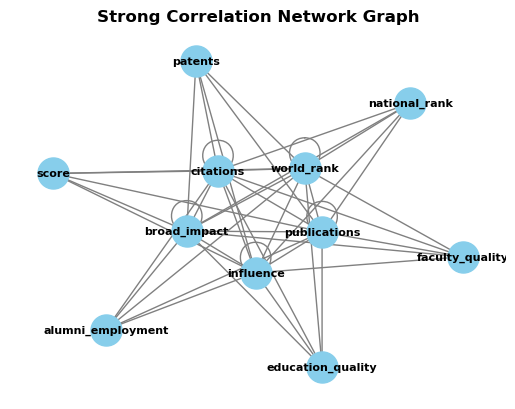

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add edges to the graph based on the strong correlations
for variable1 in strong_correlation_columns:
    for variable2 in strong_correlation_columns[variable1].index:
        G.add_edge(variable1, variable2)

# Set the layout of the graph
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Add labels to the nodes
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Set the title of the plot
plt.title('Strong Correlation Network Graph', fontsize=12, fontweight='bold')

# Remove the axis
plt.axis('off')

# Display the graph
plt.show()

The network graph reveals the cluster of the 5 strong correlation variables identified above.

These strong correlations suggest the interconnectedness between different aspects of university performance and ranking. Universities that excel in one of these often excel in the others as well, indicating the multidimensional nature of their success. 

The identified variables, such as publications, influence, citations, broad impact, and patents, serve as important drivers or indicators of university performance and significantly influence their overall rankings.

## Identify highly correlated variable pairs

- Helps gain understanding of the relationship between variables within the data set


**Code Breakdown**

This code computes the correlation matrix for the given DataFrame df using the corr() function. It then calculates the absolute correlation matrix to consider the magnitudes of the correlations using the abs() function.

Next, a threshold value is set using the variable threshold to determine the minimum correlation value for considering variables as highly correlated. In this case, the threshold is set to 0.7, indicating that variables with a correlation coefficient of 0.7 or higher will be considered highly correlated.

The code then iterates over the columns of the correlation matrix using nested loops. It compares the absolute correlation values between pairs of variables (excluding self-correlations) and checks if the correlation value is above the threshold. If a pair of variables meets this criteria, it is added to the highly_correlated_pairs list as a tuple.

Finally, the code prints the highly correlated variable pairs using a loop, displaying the pairs as strings in the format "Highly correlated variables: (var1, var2)".

In [37]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Get the absolute correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Set a threshold for strong correlation
threshold = 0.7

# Find pairs of variables with correlation above the threshold
highly_correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix_abs.iloc[i, j] >= threshold:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Print the highly correlated variable pairs with correlation values
if highly_correlated_pairs:
    print("Highly correlated variables:")
    for pair in highly_correlated_pairs:
        var1, var2, correlation = pair
        print(f"    '{var1}' and '{var2}': {correlation:.2f}")
else:
    print("No highly correlated variables found.")

Highly correlated variables:
    'world_rank' and 'publications': 0.92
    'world_rank' and 'influence': 0.89
    'world_rank' and 'citations': 0.84
    'world_rank' and 'broad_impact': 0.95
    'education_quality' and 'faculty_quality': 0.75
    'publications' and 'influence': 0.86
    'publications' and 'citations': 0.81
    'publications' and 'broad_impact': 0.93
    'influence' and 'citations': 0.83
    'influence' and 'broad_impact': 0.92
    'citations' and 'broad_impact': 0.87


The analysis of the correlation matrix revealed several highly correlated variable pairs. These correlations shed light on the relationships between different variables and their impact on university rankings. The findings include:

**'world_rank' and 'publications' (0.92):** Universities with higher rankings tend to have more research publications, indicating a strong positive correlation between the two. This suggests that research output plays a significant role in determining rankings.

**'world_rank' and 'influence' (0.89):** Higher world rankings are associated with greater influence. Influential universities tend to achieve better rankings, emphasizing the importance of impact within their respective fields.

**'world_rank' and 'citations' (0.84):** The number of citations received by universities correlates positively with their rankings. Universities with a higher citation impact, indicating the recognition and dissemination of their research, tend to achieve better rankings.

**'world_rank' and 'broad_impact' (0.95):** Broad impact demonstrates a strong positive correlation with world rankings. Universities that have a broader impact across multiple aspects, including research, reputation, and influence, tend to achieve higher rankings.

**'education_quality' and 'faculty_quality' (0.75):** There is a positive correlation between the quality of education and the quality of faculty in universities. Universities that prioritize quality education often attract and retain high-quality faculty members, leading to enhanced educational experiences.


These insights highlight the importance of research output, influence, citations, broad impact, and educational quality in determining university rankings. Understanding these correlations can provide valuable guidance for institutions aiming to improve their rankings and overall performance.

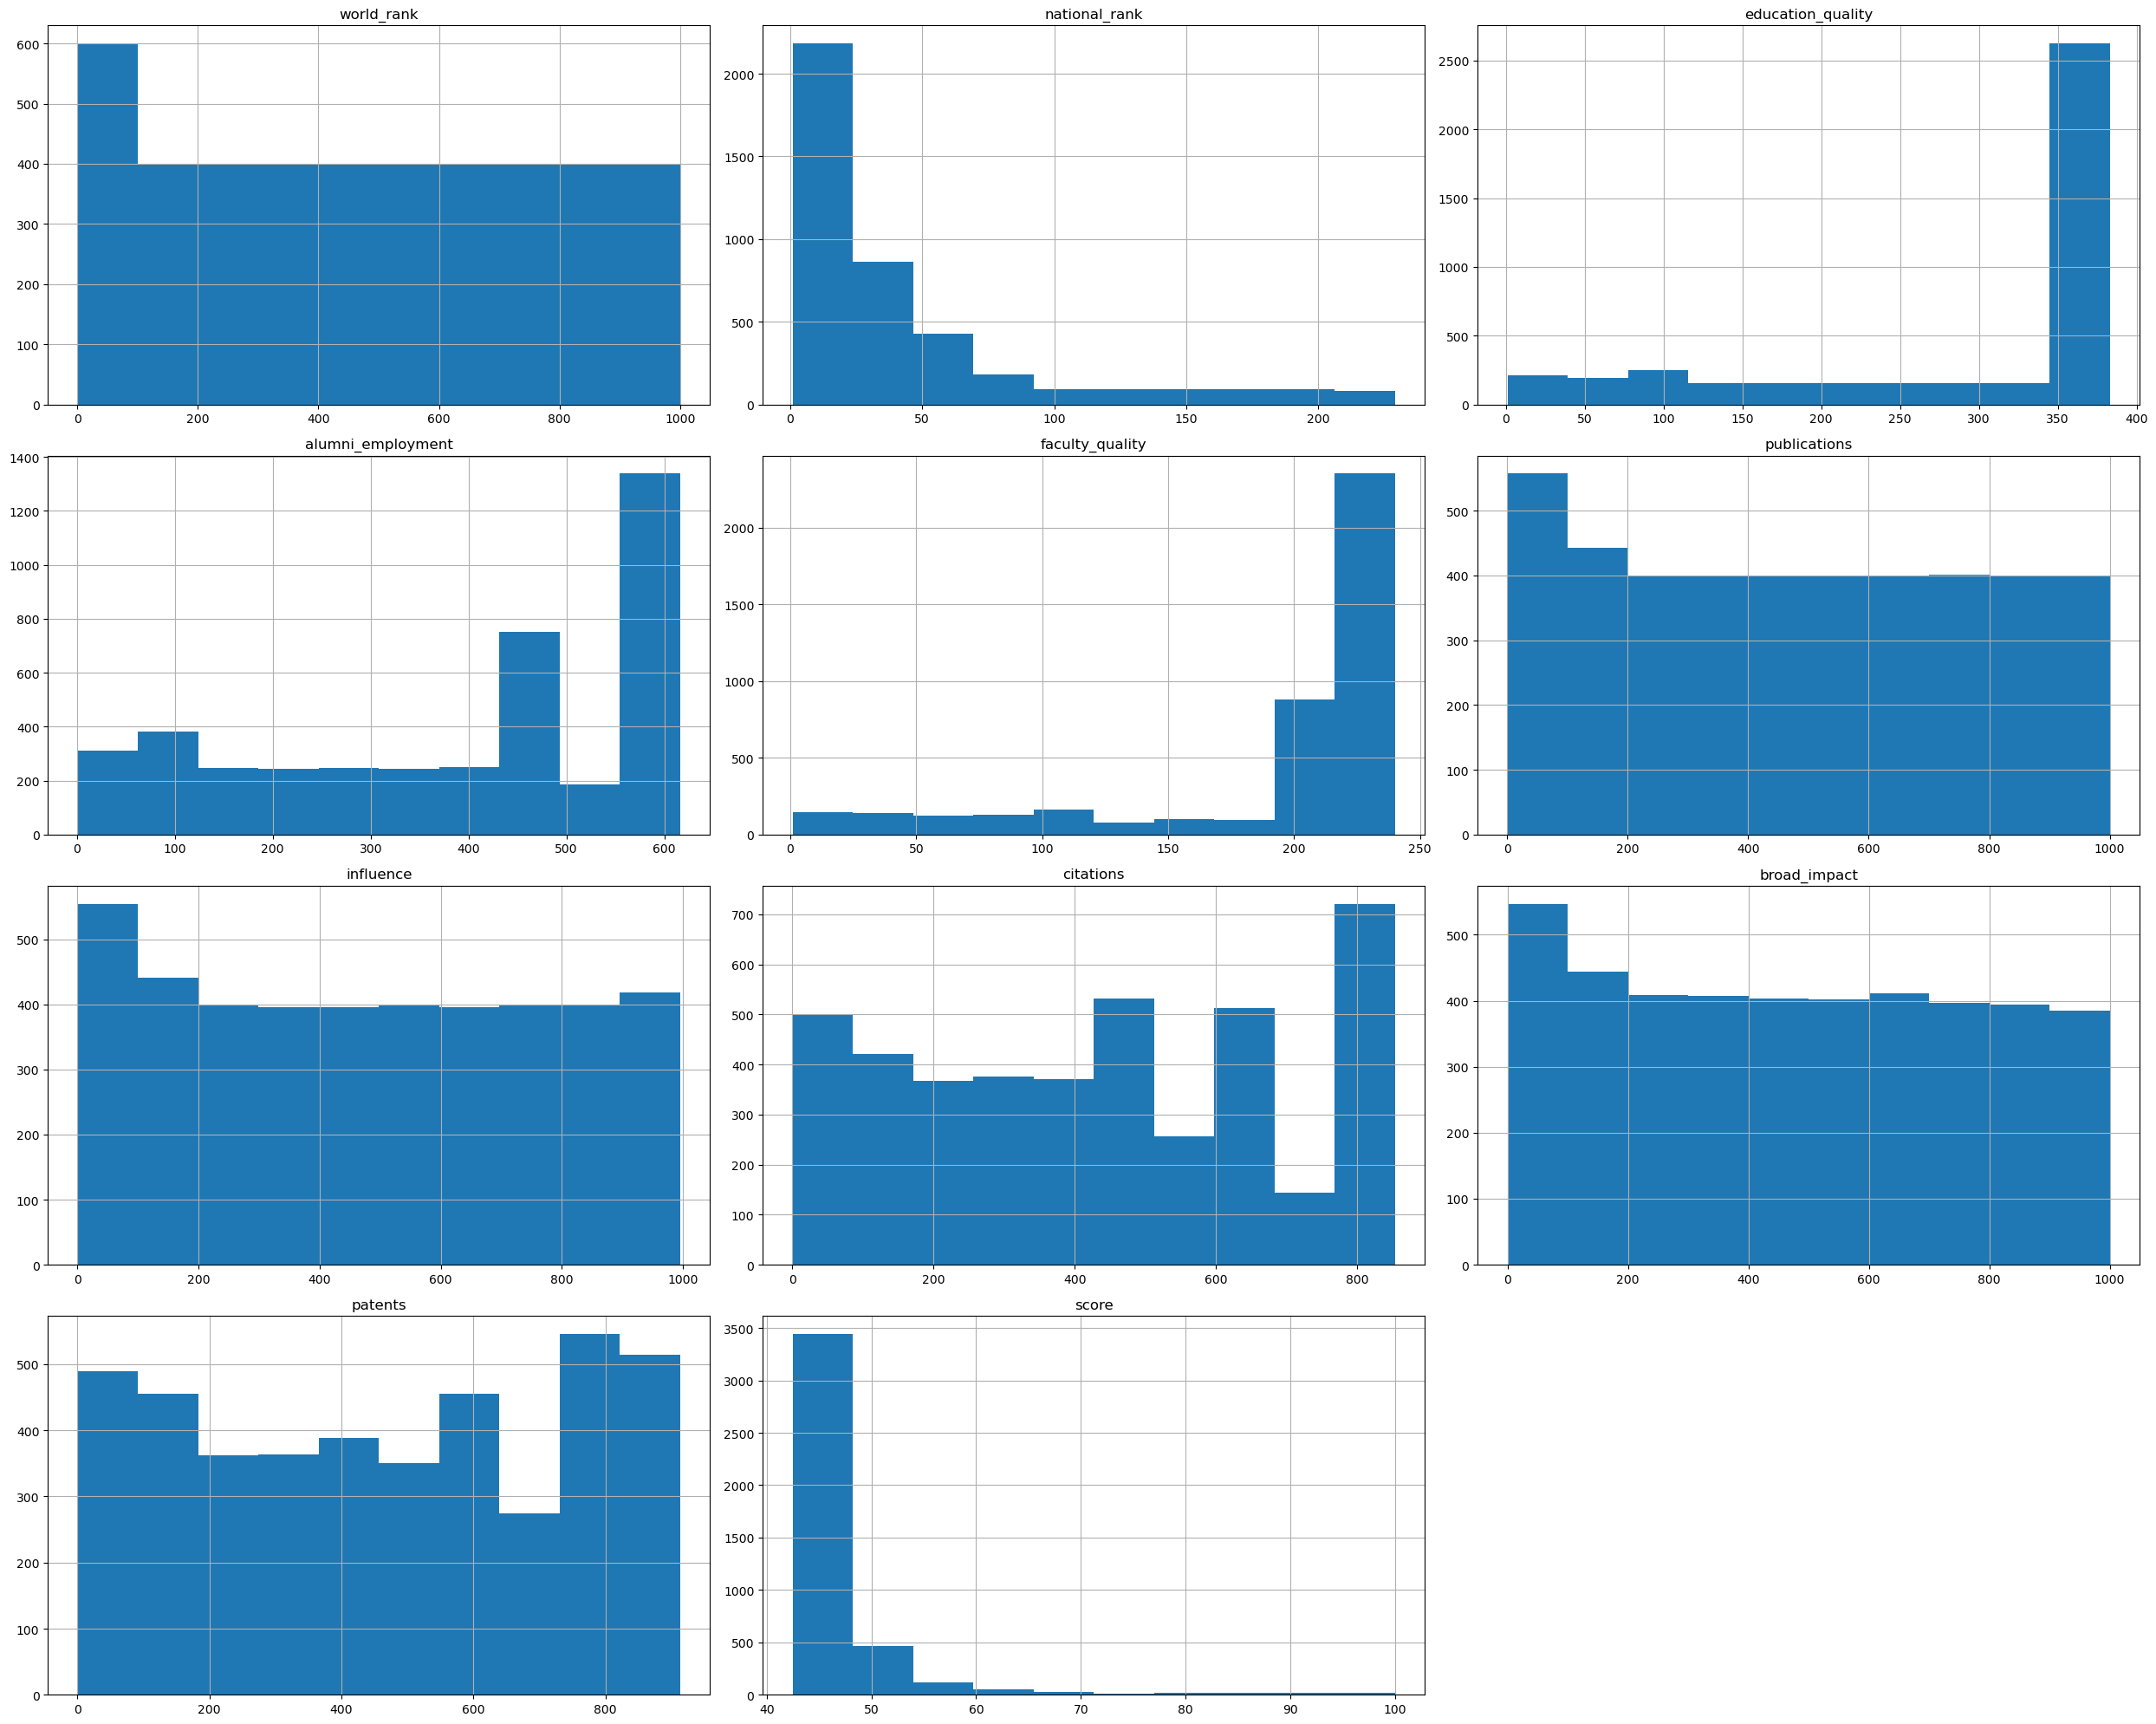

In [38]:
df.hist(bins=10, figsize=(25, 20))
plt.tight_layout()
plt.show()

# Question 1
### - How do universities rank globally and regionally across different years? 
### - Which universities consistently rank in the top 10 or 20, and which universities show the most improvement or decline over time?

#### Find Total Number of Institutions by Country (Top 20)
.
first get number of institutions and group by Country

In [39]:
df_uc = pd.read_csv('cwur_cleaned.csv')
df = df_uc


In [40]:

def sum_institutions_by_country(df):
    country_totals = df.groupby('country')['institution'].nunique().reset_index()
    country_totals.columns = ['country', 'total_institutions']
    country_totals['total_institutions'] = df.groupby('country')['institution'].nunique().values
    
    return country_totals


country_aggregate = sum_institutions_by_country(df)

country_aggregate


,country,total_institutions
0,Argentina,4
1,Australia,28
2,Austria,12
3,Belgium,10
4,Brazil,18
...,...,...
56,USA,260
57,Uganda,1
58,United Arab Emirates,1
59,United Kingdom,65


#### sort by number of institutions

In [41]:
sorted_country_aggregate  = country_aggregate.sort_values('total_institutions', ascending=False)
sorted_country_aggregate

,country,total_institutions
56,USA,260
8,China,103
28,Japan,74
59,United Kingdom,65
18,Germany,59
...,...,...
15,Estonia,1
11,Cyprus,1
10,Croatia,1
5,Bulgaria,1


#### Top 20 most represented countries

In [42]:
top_20_countries = sorted_country_aggregate.head(20)

top_20_countries


,country,total_institutions
56,USA,260
8,China,103
28,Japan,74
59,United Kingdom,65
18,Germany,59
17,France,59
27,Italy,49
50,Spain,41
49,South Korea,37
6,Canada,34


#### Barchart showing Total Number of Institutions by Country (Top 20 countries with highest institution count)

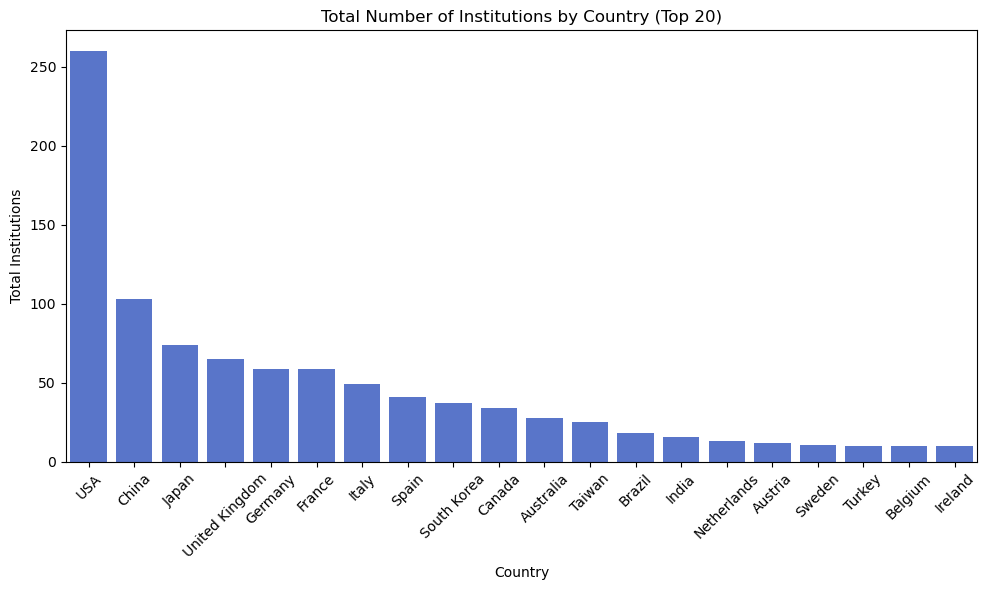

In [43]:

plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_countries, 
            x='country', y='total_institutions', 
            color='royalblue', saturation=0.7, ci=None)

plt.xlabel('Country')
plt.ylabel('Total Institutions')
plt.title('Total Number of Institutions by Country (Top 20)')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


### Lets take a closer look at the institutions in the top 5 countries

In [44]:
top_5_countries = sorted_country_aggregate.head(5)

pd.set_option('display.float_format', '{:.2f}'.format)

for country in top_5_countries['country']:
    group = df[df['country'] == country]

    print(f"Country: {country}")
    display(group)
    print()

    print(f"Statistical Analysis for {country}:")
    display(group['country'].describe())
    print()
    

Country: USA


,year,institution,country,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
0,2012,Harvard University,USA,1,1,7,9,1,1,1,1,1,5,100.00
1,2012,Massachusetts Institute of Technology,USA,2,2,9,17,3,12,4,4,2,1,91.67
2,2012,Stanford University,USA,3,3,17,11,5,4,2,2,4,15,89.50
4,2012,California Institute of Technology,USA,5,4,2,29,7,37,22,22,24,18,85.21
5,2012,Princeton University,USA,6,5,8,14,2,53,33,26,41,101,82.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,2017,University of Massachusetts Lowell,USA,931,221,383,488,240,939,973,482,974,333,42.55
4134,2017,University of North Carolina at Greensboro,USA,935,222,383,616,240,883,864,709,887,686,42.54
4154,2017,"Queens College, City University of New York",USA,955,223,345,377,240,976,753,853,957,713,42.53
4165,2017,Oakland University,USA,966,224,383,616,240,899,857,853,920,862,42.52



Statistical Analysis for USA:


count     1022
unique       1
top        USA
freq      1022
Name: country, dtype: object


Country: China


,year,institution,country,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
254,2014,Peking University,China,55,1,355,35,210,65,155,250,155,7,55.30
286,2014,Tsinghua University,China,87,2,294,63,210,79,192,134,162,16,52.60
388,2014,Fudan University,China,189,3,355,126,210,120,264,310,230,100,48.14
394,2014,Shanghai Jiao Tong University,China,195,4,325,149,210,102,250,250,234,138,48.02
405,2014,Zhejiang University,China,206,5,355,293,210,86,318,493,290,94,47.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,2017,Zhejiang Normal University,China,986,93,383,616,240,849,955,709,957,913,42.50
4189,2017,Hunan Normal University,China,990,94,383,616,240,941,909,853,957,913,42.49
4193,2017,Anhui University,China,994,95,383,453,240,924,938,853,974,913,42.49
4195,2017,Nanchang University,China,996,96,383,538,240,747,961,853,974,842,42.49



Statistical Analysis for China:


count       354
unique        1
top       China
freq        354
Name: country, dtype: object


Country: Japan


,year,institution,country,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
13,2012,University of Tokyo,Japan,14,1,32,19,31,8,19,23,26,3,69.49
16,2012,Kyoto University,Japan,17,2,42,38,19,25,36,43,51,23,65.76
31,2012,Osaka University,Japan,32,3,77,101,44,39,44,51,56,11,54.43
73,2012,Nagoya University,Japan,74,4,56,101,69,101,101,101,192,46,46.89
78,2012,Tohoku University,Japan,79,5,53,101,101,49,100,67,112,29,45.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,2017,Hamamatsu University School of Medicine,Japan,917,67,383,616,240,985,919,709,887,433,42.56
4122,2017,University of Miyazaki,Japan,923,68,316,616,240,987,744,709,903,441,42.55
4136,2017,Nagoya Institute of Technology,Japan,937,69,383,560,240,907,930,853,981,289,42.54
4167,2017,Shimane University,Japan,968,70,383,616,240,983,799,709,920,766,42.52



Statistical Analysis for Japan:


count       304
unique        1
top       Japan
freq        304
Name: country, dtype: object


Country: United Kingdom


,year,institution,country,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
3,2012,University of Cambridge,United Kingdom,4,1,10,24,4,16,16,11,13,50,86.17
6,2012,University of Oxford,United Kingdom,7,2,13,28,9,15,13,19,12,26,82.34
27,2012,Imperial College London,United Kingdom,28,3,84,73,35,26,26,29,17,41,57.53
30,2012,University College London,United Kingdom,31,4,35,101,45,27,23,33,21,86,55.21
59,2012,University of Edinburgh,United Kingdom,60,1,71,101,43,64,41,70,46,101,48.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2017,University of Bradford,United Kingdom,797,61,383,225,240,892,807,853,967,564,42.67
4102,2017,University of Central Lancashire,United Kingdom,903,62,383,541,240,926,674,576,864,663,42.57
4109,2017,"Royal Veterinary College, University of London",United Kingdom,910,63,277,616,240,851,555,709,876,649,42.56
4125,2017,Manchester Metropolitan University,United Kingdom,926,64,383,434,240,955,750,709,903,766,42.55



Statistical Analysis for United Kingdom:


count                274
unique                 1
top       United Kingdom
freq                 274
Name: country, dtype: object


Country: Germany


,year,institution,country,world_rank,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
81,2012,Ruprecht Karl University of Heidelberg,Germany,82,1,87,101,52,86,58,100,54,101,45.33
82,2012,Ludwig Maximilian University of Munich,Germany,83,2,90,101,90,60,45,62,48,101,45.21
89,2012,Technical University of Munich,Germany,90,3,52,101,101,91,76,94,97,101,44.32
166,2013,Ludwig Maximilian University of Munich,Germany,67,1,62,101,92,67,49,67,50,101,47.25
178,2013,Ruprecht Karl University of Heidelberg,Germany,79,2,73,101,55,82,59,100,50,101,46.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,2017,University of Oldenburg,Germany,827,53,383,616,240,756,523,576,775,766,42.64
4043,2017,University of Wuppertal,Germany,844,54,383,616,240,992,898,576,775,754,42.63
4077,2017,University of Veterinary Medicine Hanover,Germany,878,55,383,616,240,882,906,853,828,842,42.59
4091,2017,University of Osnabrück,Germany,892,56,383,616,240,891,695,709,842,842,42.58



Statistical Analysis for Germany:


count         228
unique          1
top       Germany
freq          228
Name: country, dtype: object

The data above provides an overview of the top 5 countries in the dataset and enables for comparisons and insights into university performance within each country.

# QUESTION 2

### How do different factors, such as quality of education, alumni employment, and publications, contribute to a  university's overall ranking? Are some factors more heavily weighted than others

In [45]:
df_uc = pd.read_csv('cwur_cleaned.csv')
df = df_uc

To answer this question, three hypothesis were developed;
- HYPOTHESIS 1: UNIVERSITIES WITH HIGHER PUBLICATION COUNTS HAVE A GREATER INFLUENCE AND CITATIONS
- HYPOTHESIS 2: UNIVERSITIES WITH HIGHER QUALITY OF EDUCATION HAVE HIGHER ALUMNI EMPLOYMENT RATES
- HYPOTHESIS 3: UNIVERSITIES WITH A HIGHER NUMBER OF PATENTS ALSO HAVE HIGHER SCORES

## HYPOTHESIS 1: 
### Universities with higher publication counts tend to have a greater influence and receive more citations.

#### find correlation matrix

In [46]:
correlation_matrix = df[['publications', 'influence', 'citations']].corr()

print(correlation_matrix)

              publications  influence  citations
publications          1.00       0.86       0.81
influence             0.86       1.00       0.83
citations             0.81       0.83       1.00


### Visualise the correlation matrix as a heatmap:

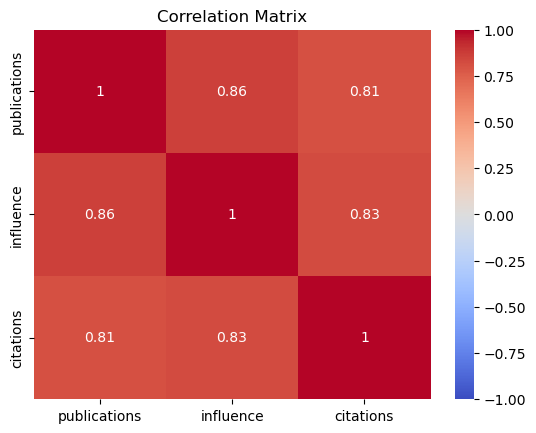

In [47]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Calculate the P-values associated with the correlations to determine the statistical significance of the relationships.

The p-values will indicate the statistical significance of the correlations. Lower p-values (typically below 0.05) suggest stronger evidence against the null hypothesis.

In [48]:
from scipy.stats import pearsonr

corr_pub_infl, p_value_infl = pearsonr(df['publications'], df['influence'])
corr_pub_cit, p_value_cit = pearsonr(df['publications'], df['citations'])

print("Correlation between publications and influence:", corr_pub_infl)
print("p-value for the correlation between publications and influence:", p_value_infl)

print("Correlation between publications and citations:", corr_pub_cit)
print("p-value for the correlation between publications and citations:", p_value_cit)

Correlation between publications and influence: 0.8626804819320395
p-value for the correlation between publications and influence: 0.0
Correlation between publications and citations: 0.8105269468673458
p-value for the correlation between publications and citations: 0.0


The resulting output supports the hypothesis that universities with higher publication counts tend to have a greater influence and receive more citations. 
The **correlation coefficients** of **0.862** and **0.810** indicate strong positive relationships between publication counts and both influence and citations, respectively. The **p-values** of **0.0** indicate that these correlations are statistically significant, providing strong evidence that the observed relationships are unlikely to occur by chance. 

Therefore, the results suggest that universities with higher publication counts have a greater influence and receive more citations.

## HYPOTHESIS 2: 
## Universities with higher quality of education tend to have higher alumni employment rates

In [49]:
correlation_matrix = df[['education_quality', 'alumni_employment']].corr()

print(correlation_matrix)

                   education_quality  alumni_employment
education_quality               1.00               0.56
alumni_employment               0.56               1.00


#### Visualise the correlation matrix as a heatmap:

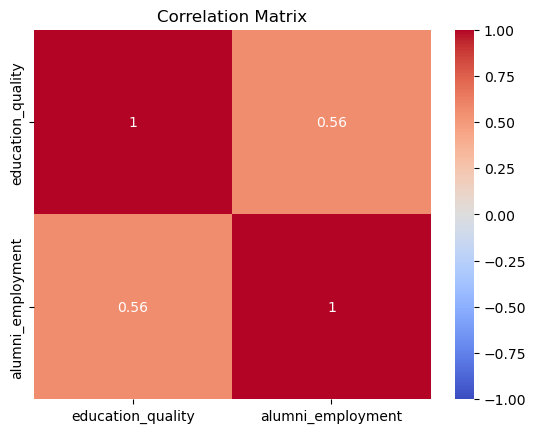

In [50]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Calculate the P-values associated with the correlations to determine the statistical significance of the relationships.

In [51]:

corr_edu_alumni, p_value = pearsonr(df['education_quality'], df['alumni_employment'])

print("Correlation between education_quality and alumni_employment:", corr_edu_alumni)
print("p-value for the correlation between education_quality and alumni_employment:", p_value)

Correlation between education_quality and alumni_employment: 0.5572211653509208
p-value for the correlation between education_quality and alumni_employment: 0.0


These results indicate that there is a moderate positive relationship between Quality of Education and Alumni Employment in universities. 
Higher quality of education tends to be associated with higher employment rates. The statistically significant p-value affirms the strength of this relationship

## HYPOTHESIS 3: 
## Universities with a higher number of patents tend to have higher scores.

In [52]:
correlation_matrix = df[['patents', 'score']].corr()

print(correlation_matrix)

         patents  score
patents     1.00  -0.47
score      -0.47   1.00


#### Visualise the correlation matrix as a heatmap:

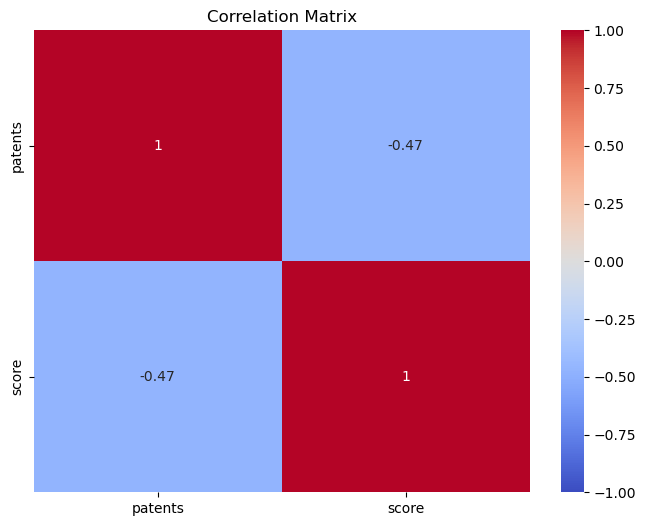

In [53]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Calculate the P-values associated with the correlations to determine the statistical significance of the relationships.

In [54]:

corr_pat_score, p_value = pearsonr(df['patents'], df['score'])

print("Correlation between patents and scores:", corr_pat_score)
print("p-value for the correlation between pantents and score:", p_value)

Correlation between patents and scores: -0.47104628258616926
p-value for the correlation between pantents and score: 5.228120595792972e-231


The resulting output a negative correlation between the number of patents and the scores of universities. 
The analysis reveals a strong negative correlation of -0.471 betweenthe variables. This suggests that there is a significant relationship between the number of patents and the scores. The p-value of 5.228e-231 indicates that the observed correlation is statistically significant, further supporting the strength of the correlation.

Universities with fewer patents may have higher scores, while those with a greater number of patents may have lower scores.

# QUESTION: 3

## How do universities from different countries perform in terms of overall ranking and individual factors? 
## Are there certain countries that consistently produce high-performing universities, and are there any notable trends or patterns in the data?

In [55]:
df_dr = pd.read_csv('cwur_cleaned.csv')
df = df_dr

### Find the average university ranking by country

In [56]:
# Overall ranking by country
avg_ranking_by_country = df.groupby('country')['world_rank'].mean().sort_values(ascending=True)
avg_ranking_by_country

country
Singapore                97.11
Switzerland             208.09
Israel                  217.25
Netherlands             219.76
Denmark                 239.59
                         ...  
Egypt                   922.50
United Arab Emirates    942.00
Puerto Rico             946.25
Romania                 971.57
Macau                  1000.00
Name: world_rank, Length: 61, dtype: float64

### Next, we will filter the top five countries

In [57]:
# Top countries with highest average ranking
top_10_countries = avg_ranking_by_country.head(10)
top_10_countries

country
Singapore      97.11
Switzerland   208.09
Israel        217.25
Netherlands   219.76
Denmark       239.59
Sweden        261.00
USA           320.16
Hong Kong     345.33
Norway        361.77
Belgium       368.38
Name: world_rank, dtype: float64

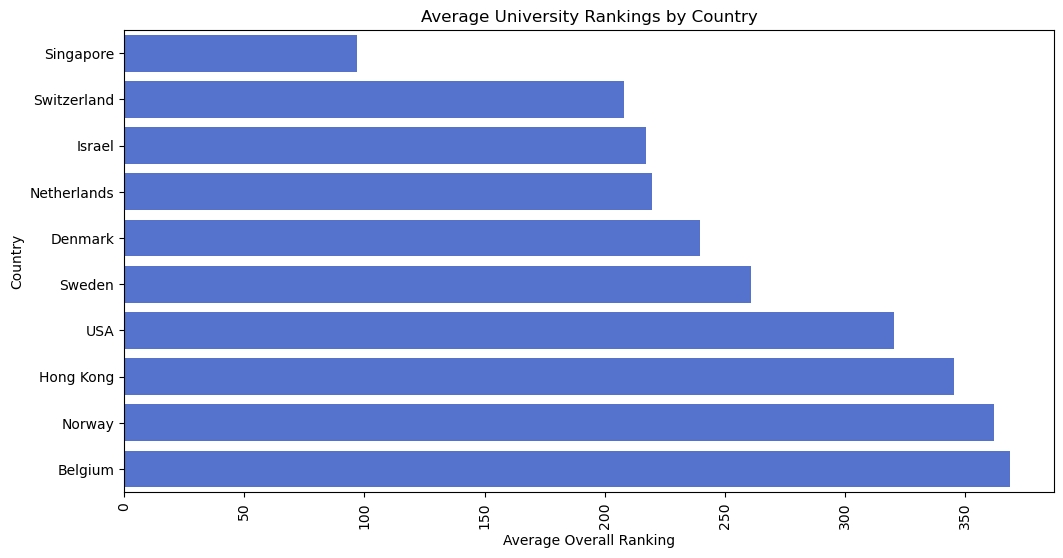

In [58]:
# Plotting average ranking by country
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries, y=top_10_countries.index, color='royalblue')
plt.xlabel('Average Overall Ranking')
plt.ylabel('Country')
plt.title('Average University Rankings by Country')
plt.xticks(rotation=90)

plt.show()

In [59]:
### Individual factors analysis

In [60]:

factors = ['education_quality', 'alumni_employment', 'faculty_quality', 'publications', 'influence', 'citations']


#### Analyze individual factors by country:

           country  education_quality
42          Russia             103.21
29         Lebanon             120.00
26          Israel             140.89
52     Switzerland             149.70
51          Sweden             231.96
56             USA             237.53
59  United Kingdom             251.51
3          Belgium             253.12
5         Bulgaria             260.00
48    South Africa             265.10



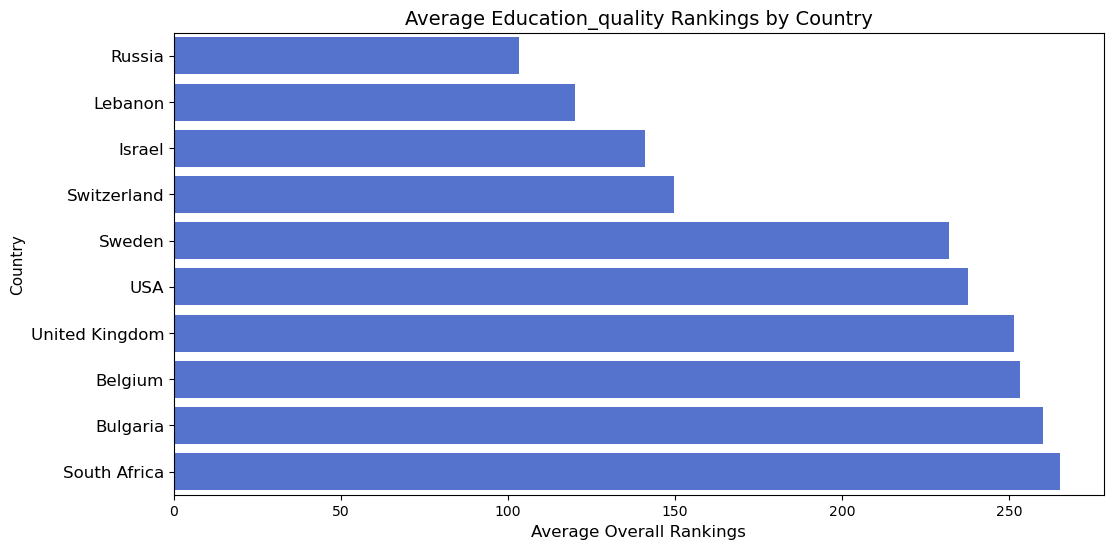

           country  alumni_employment
48    South Africa             154.38
29         Lebanon             206.50
9         Colombia             250.50
52     Switzerland             266.61
56             USA             286.80
26          Israel             293.78
45       Singapore             296.44
6           Canada             305.90
43    Saudi Arabia             330.00
59  United Kingdom             332.57



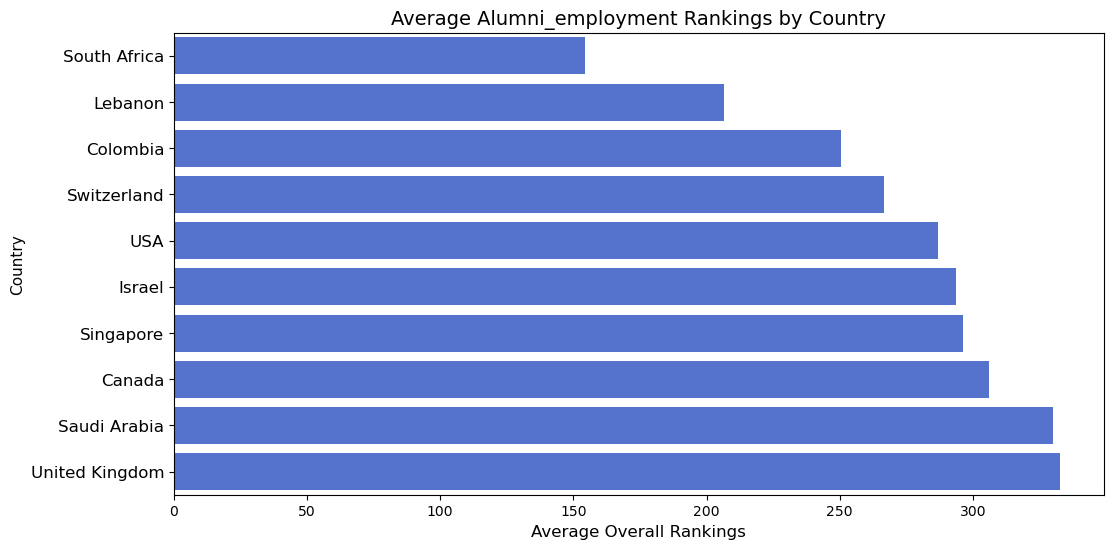

           country  faculty_quality
26          Israel            96.72
52     Switzerland           119.07
36          Norway           155.00
13         Denmark           157.05
51          Sweden           158.46
56             USA           160.50
59  United Kingdom           180.20
3          Belgium           181.25
42          Russia           181.74
34     Netherlands           188.00



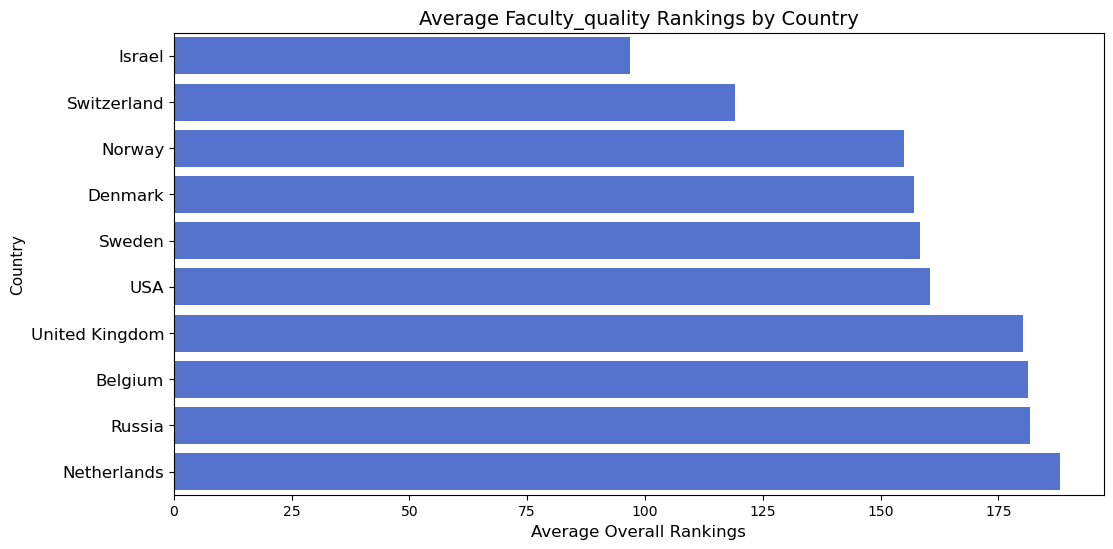

        country  publications
45    Singapore         66.00
34  Netherlands        173.09
26       Israel        235.42
13      Denmark        235.82
52  Switzerland        240.73
51       Sweden        264.24
20    Hong Kong        274.08
36       Norway        340.73
56          USA        375.11
18      Germany        383.04



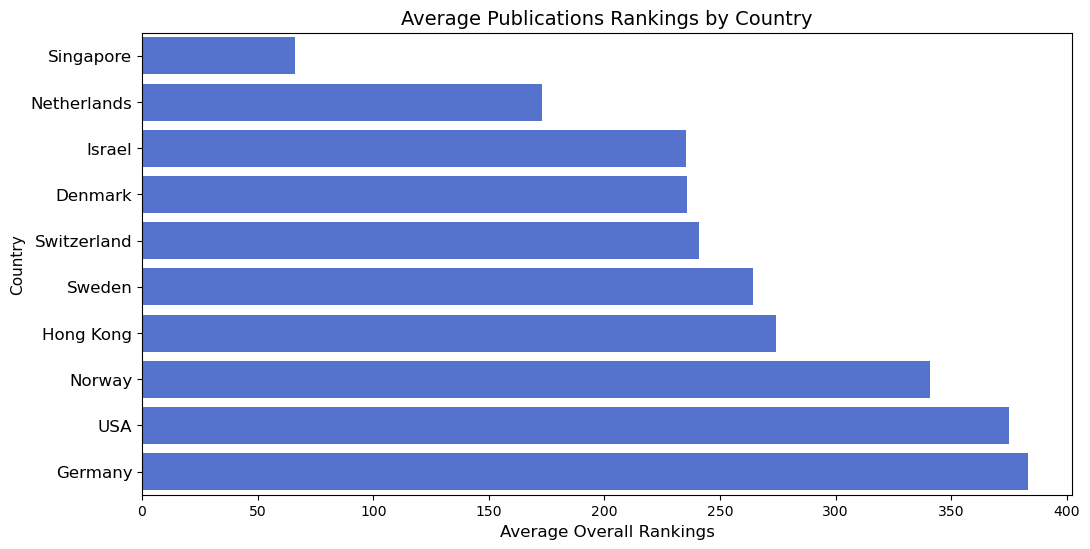

        country  influence
52  Switzerland     168.20
26       Israel     215.92
45    Singapore     220.22
13      Denmark     238.68
34  Netherlands     246.64
51       Sweden     252.63
22      Iceland     292.00
36       Norway     308.14
56          USA     308.33
15      Estonia     324.50



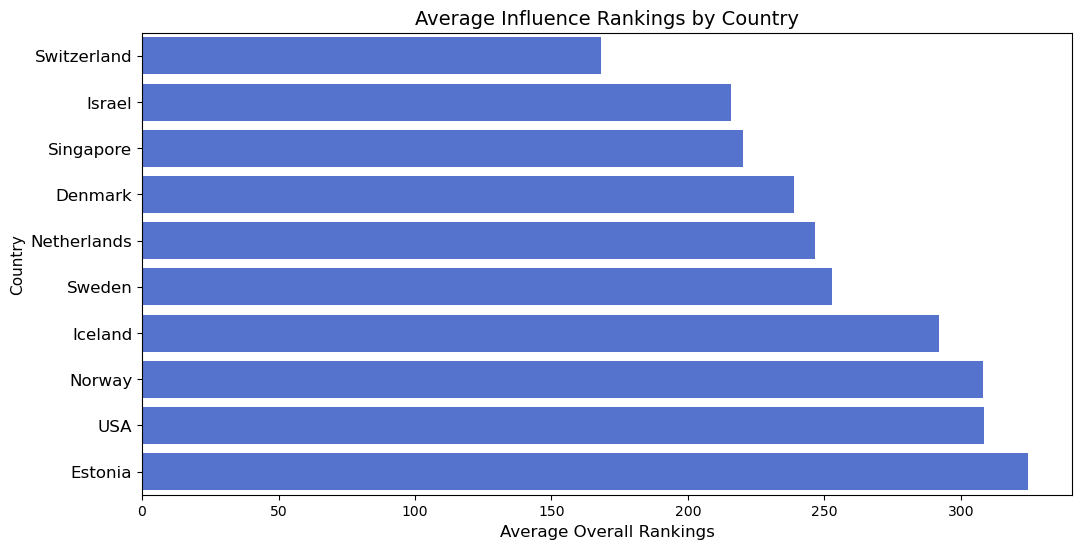

        country  citations
45    Singapore     123.22
34  Netherlands     182.93
13      Denmark     182.95
52  Switzerland     187.70
51       Sweden     237.85
36       Norway     284.41
56          USA     290.26
3       Belgium     296.82
22      Iceland     318.50
26       Israel     327.56



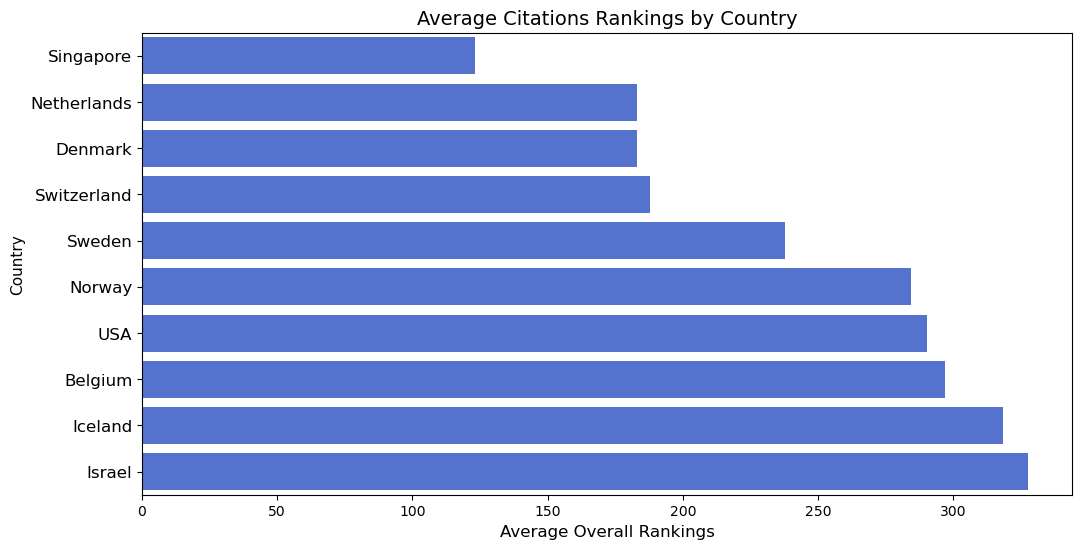

In [61]:
factors = ['education_quality', 'alumni_employment', 'faculty_quality', 'publications', 'influence', 'citations']

# Iterate through each factor and plot the average scores by country
for factor in factors:
    factor_ranking = df.groupby('country')[factor].mean().reset_index()
    sorted_factor_ranking = factor_ranking.sort_values(factor)
    top_10 = sorted_factor_ranking.head(10)
    print(top_10)
    print()


    plt.figure(figsize=(12, 6))
    sns.barplot(x=factor, y='country', data=top_10, color='royalblue' )
    plt.xlabel(f'Average Overall Rankings', fontsize=12)
    plt.ylabel('Country', fontsize=11)

    plt.title(f'Average {factor.capitalize()} Rankings by Country', fontsize=14)
    plt.yticks(fontsize=12)

    plt.show()

By plotting the average scores for each individual factor, you can observe how universities from different countries perform in areas such as education quality, alumni employment, faculty quality, publications, influence, citations, broad impact, and patents.

By examining the overall ranking and individual factors across countries, you can identify countries that consistently produce high-performing universities and uncover any notable trends or patterns in the data.

In [62]:
# Calculate the yearly average ranking per institution
yearly_avg_ranking = df.groupby(['year', 'institution'])['world_rank'].mean().reset_index()

top_50_rankings = yearly_avg_ranking.sort_values('world_rank').head(50)

# Define a formatting function
def format_rank(rank):
    return int(rank)

# Apply the formatting function to the 'world_rank' column
top_50_rankings['world_rank'] = top_50_rankings['world_rank'].apply(format_rank)

print(top_50_rankings)


      year                            institution  world_rank
1380  2015                     Harvard University           1
3385  2017                     Harvard University           1
380   2014                     Harvard University           1
2386  2016                     Harvard University           1
112   2013                     Harvard University           1
12    2012                     Harvard University           1
20    2012  Massachusetts Institute of Technology           2
2701  2016                    Stanford University           2
1697  2015                    Stanford University           2
142   2013                    Stanford University           2
698   2014                    Stanford University           2
3702  2017                    Stanford University           2
505   2014  Massachusetts Institute of Technology           3
3507  2017  Massachusetts Institute of Technology           3
38    2012                    Stanford University           3
1505  20

### Visualise

To display the performance such that the lower rank value indicates higher performance in the graph as in the case of our data, we reversed the y-axis scale. This inverts the ranking values, making lower values (Higher rank) appear at the top of the graph.

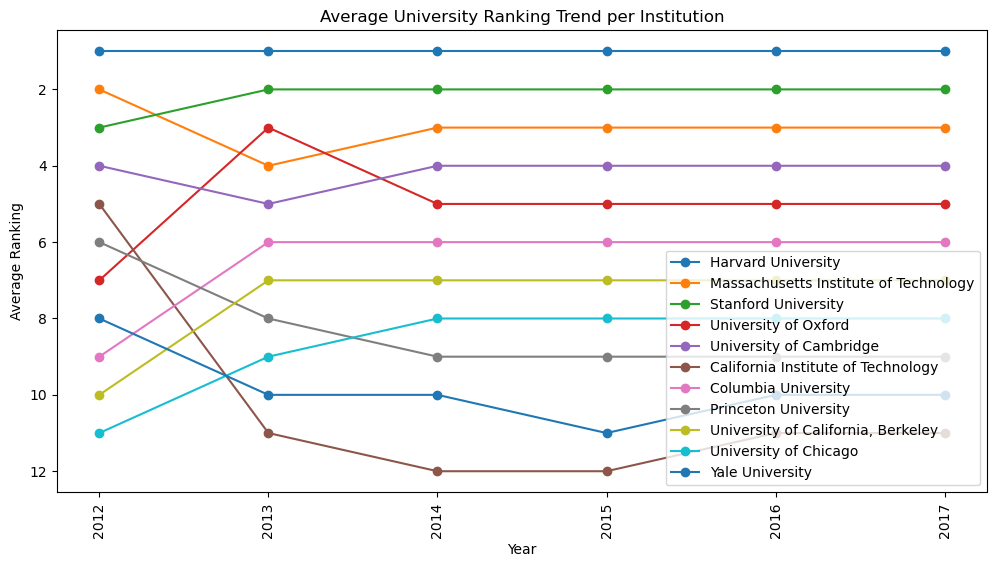

In [63]:

# Plotting average ranking trend for each institution
plt.figure(figsize=(12, 6))
for institution in top_50_rankings['institution'].unique():
    institution_data = yearly_avg_ranking[yearly_avg_ranking['institution'] == institution]
    plt.plot(institution_data['year'], institution_data['world_rank'], marker='o', label=institution)

plt.xlabel('Year')
plt.ylabel('Average Ranking')
plt.title('Average University Ranking Trend per Institution')
plt.legend()
plt.xticks(rotation=90)

# Reverse the y-axis scale
plt.gca().invert_yaxis()

plt.show()


From the time series above we see the following trends:

**Harvard University** consistently holds the top position across all years in the dataset, with a world rank of 1 in each year.

**Stanford University** and the **Massachusetts Institute of Technology (MIT)** also exhibit consistent strong performance, consistently ranking at 2 and 3, respectively, in multiple years.

The **University of Cambridge** and the **University of Oxford** consistently secure positions within the top 5 institutions, with world ranks of 4 and 5, respectively.

Other notable institutions, including **Columbia University**, the **University of California, Berkeley**, the **University of Chicago**, and **Princeton University**, show varying rankings ranging from 6 to 9 across different years.

The rankings of these institutions generally remain relatively stable over time, with minor fluctuations.

Overall, these insights highlight the consistent performance of prestigious institutions such as Harvard University, Stanford University, MIT, the University of Cambridge, and the University of Oxford, which consistently rank among the top institutions in the dataset.

# QUESTION 4:

## What is the relationship between the number of students at a university and its ranking? Does a larger student body generally correspond to a higher ranking, or are there other factors at play?

In [64]:
df_ya = pd.read_csv('cwur_cleaned.csv')

df = df_ya

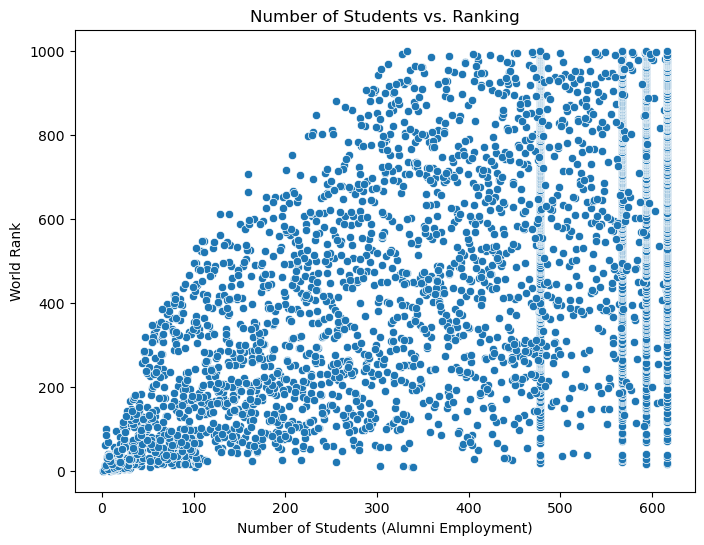

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="alumni_employment", y="world_rank", data=df)
plt.title("Number of Students vs. Ranking")
plt.xlabel("Number of Students (Alumni Employment)")
plt.ylabel("World Rank")
plt.show()

Conclusion:The scatter plot depicts the association between the number of students (as indicated by alumni employment) and university ranking. The x-axis depicts the number of students, while the y-axis indicates university rankings all over the world. Each data point in the figure represents a single university, showing its student population and rating. The figure aids in determining a connection between these two variables. If the connection is positive, we would see a rising trend from left to right, indicating that colleges with a bigger student body have higher rankings. A negative correlation, on the reverse hand, might end in a downward trend. The plot's title, "Number of Students vs. Ranking," summarizes the plot's objective.
The x-axis label, "Number of Students (Alumni Employment)," clarifies the x-axis variable, while the y-axis label, "World Rank," specifies the y-axis variable. The scatter plot could offer significant insights into the possible relationship between the number of students and the ranking of colleges.

In [66]:
# Correlation matrix
correlation_matrix = df.corr()

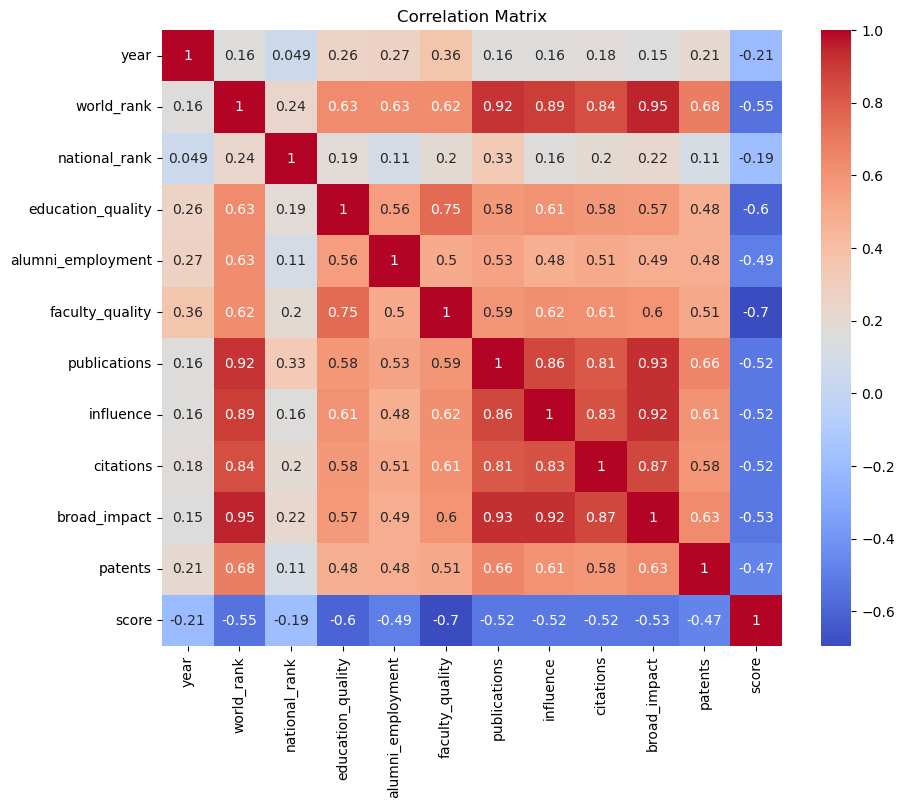

In [67]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Conclusion: The correlation matrix measures the relationships between different variables in the dataset. The heatmap provides a color-coded representation of these correlations.
The plot is created using a figure size of 10x8 to ensure clarity. The seaborn heatmap function is used to generate the visualization. The correlation_matrix is passed as the data input, and the annot=True parameter enables the display of correlation values within each cell of the heatmap. The cmap="coolwarm" parameter sets the color palette for the heatmap.

The plot's title is set as "Correlation Matrix" to indicate the purpose of the visualization. The heatmap allows for a quick and intuitive understanding of the strength and direction of correlations between variables. Positive correlations are shown in warmer colors, while negative correlations are displayed in cooler colors.

By examining the heatmap, patterns and relationships between variables can be identified. This aids in understanding the interdependencies and potential influences among the factors represented in the correlation matrix.


# QUESTION 5:

## Are there any notable differences in performance or ranking between public and private universities, or between universities with different levels of funding or resources?

In [68]:
# Create a new column indicating university type (public or private)
df["university_type"] = np.where(df["country"] == "USA", "Private", "Public")
print(df["university_type"])

0       Private
1       Private
2       Private
3        Public
4       Private
         ...   
4195     Public
4196     Public
4197     Public
4198     Public
4199     Public
Name: university_type, Length: 4200, dtype: object


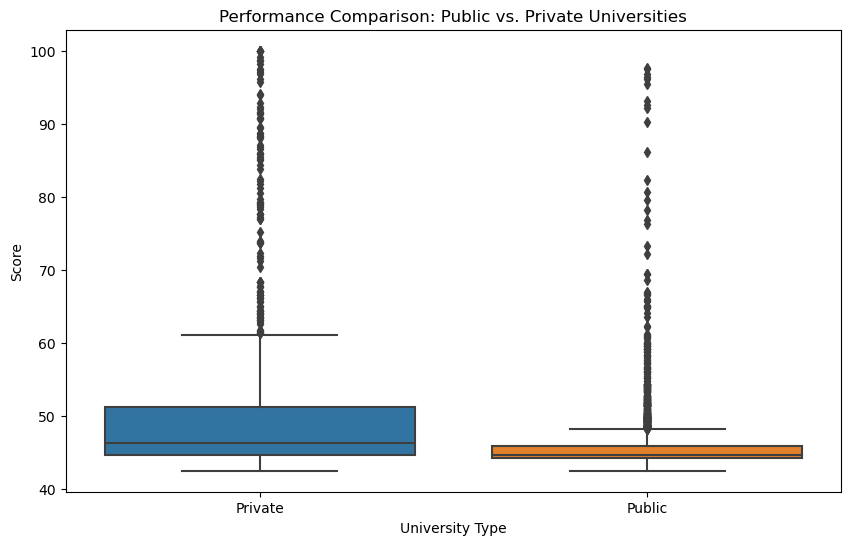

In [69]:
# Plotting performance based on university type
plt.figure(figsize=(10, 6))
sns.boxplot(x="university_type", y="score", data=df)
plt.title("Performance Comparison: Public vs. Private Universities")
plt.xlabel("University Type")
plt.ylabel("Score")
plt.show()

Conclusion:the two boxplots compare the performance and ranking of public and private universities. The performance boxplot shows the distribution of scores, while the ranking boxplot displays the distribution of world ranks for each university type. These visualizations enable us to identify any notable differences between public and private universities in terms of performance and ranking. If the medians or distributions of scores or ranks differ significantly between the two types, it suggests a disparity in performance or overall ranking. The boxplots provide valuable insights into these differences, aiding in the understanding of potential disparities and facilitating further analysis or decision-making regarding university choices or funding allocation. These visualizations serve as informative tools for assessing the performance and ranking characteristics of public and private universities.

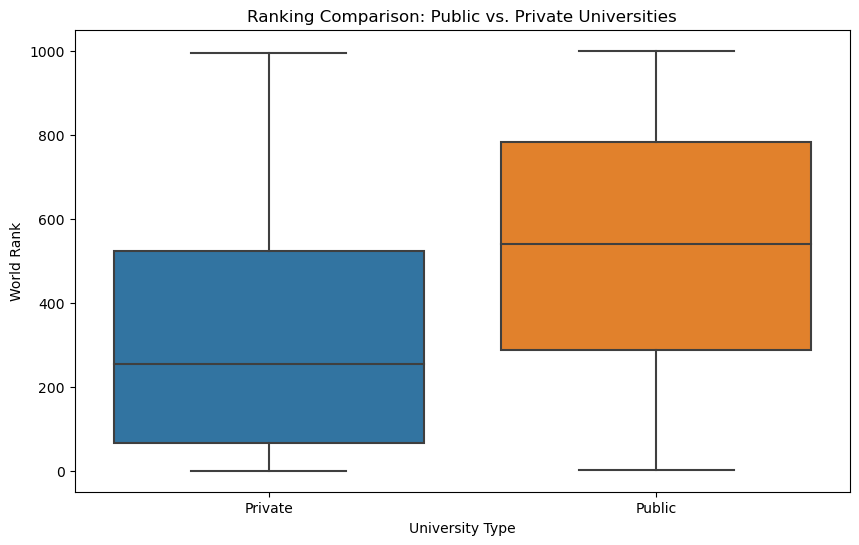

In [70]:
# Plotting ranking based on university type
plt.figure(figsize=(10, 6))
sns.boxplot(x="university_type", y="world_rank", data=df)
plt.title("Ranking Comparison: Public vs. Private Universities")
plt.xlabel("University Type")
plt.ylabel("World Rank")
plt.show()

In [71]:
# Create a subplots grid for multiple plots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Funding vs. World Rank", "Resources vs. World Rank"))
print(fig)

Figure({
    'data': [],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Funding vs. World Rank',
                                'x': 0.225,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Resources vs. World Rank',
                                'x': 0.775,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'}],
               'template': '...',
            

In [72]:
# Scatter plot of funding vs. world rank
fig.add_trace(
    go.Scatter(x=df["publications"], y=df["world_rank"], mode="markers", name="Publications"),
    row=1, col=2
)

In [73]:
# Scatter plot of resources vs. world rank
fig.add_trace(
    go.Scatter(x=df["influence"], y=df["world_rank"], mode="markers", name="Influence"),
    row=1, col=2
)

In [74]:
# Update layout and display plot
fig.update_layout(height=500, width=1000, title_text="Funding and Resources vs. World Rank")
fig.show()

Conclusion:The two scatter plots comparing funding and resources against the world rank of universities.

The first scatter plot visualizes the relationship between the number of publications (representing funding) and the world rank. Each data point represents a university, and its position on the plot indicates the number of publications and the corresponding world rank.

The second scatter plot examines the relationship between influence (representing resources) and the world rank. Similarly, each point on the plot represents a university, and its position signifies the influence score and the associated world rank.

By examining these scatter plots, we can assess any notable differences in the funding and resources of universities with respect to their world ranks. If there is a clear pattern or correlation between funding/resources and world rank, it indicates that these factors play a significant role in determining a university's ranking.

The plots help us gain insights into the impact of funding and resources on university rankings, assisting in understanding the factors that contribute to a university's performance and reputation.

# QUESTION 6:

## Are there any notable correlations or patterns in the data that could be used to predict a university's future
performance or ranking?

In [75]:
df_rf = pd.read_csv('cwur_cleaned.csv')

df = df_rf

Creating a model we are using sklearn library now here we are spliting the data into two parts for training and testing 

In [76]:
# data is already cleaned just spiliting the data into two parts(training/testing)
y = df['world_rank']
#dropping the string columns for training the model
X = df.drop(columns=['world_rank','institution','country'])

#spliting the data for accuracy with 20% for test and 80% for train
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

x_train

,year,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
2203,2016,1,3,10,6,12,8,14,12,45,96.13
2914,2016,44,282,594,235,901,913,664,733,249,44.52
929,2014,26,355,478,210,769,584,800,690,307,44.61
1309,2015,4,313,193,196,64,96,68,67,316,50.10
941,2014,2,355,478,210,667,567,800,642,737,44.59
...,...,...,...,...,...,...,...,...,...,...,...
4150,2017,6,383,516,240,920,675,482,920,766,42.53
3840,2017,45,283,437,240,618,582,576,601,477,42.88
3885,2017,4,383,616,240,614,436,709,621,663,42.81
309,2014,1,53,478,77,80,88,99,74,481,50.76


In [77]:
y_train

2203      4
2914    715
929     730
1309    110
941     742
       ... 
4150    951
3840    641
3885    686
309     110
858     659
Name: world_rank, Length: 3360, dtype: int64

In [78]:
x_test

,year,national_rank,education_quality,alumni_employment,faculty_quality,publications,influence,citations,broad_impact,patents,score
1263,2015,40,133,280,29,111,59,46,55,77,53.63
663,2014,149,196,176,210,568,474,493,554,280,45.25
39,2012,29,101,101,28,68,72,36,56,101,52.15
2418,2016,8,378,594,235,176,327,171,163,363,47.20
1078,2014,6,355,340,210,973,860,493,923,481,44.42
...,...,...,...,...,...,...,...,...,...,...,...
2284,2016,49,378,594,82,95,69,49,27,61,51.76
2818,2016,40,378,594,235,667,779,818,536,912,44.66
160,2013,41,101,101,101,53,40,60,40,40,47.80
2985,2016,58,378,361,235,760,722,664,759,883,44.44


In [79]:
y_test

1263     64
663     464
39       40
2418    219
1078    879
       ... 
2284     85
2818    619
160      61
2985    786
2341    142
Name: world_rank, Length: 840, dtype: int64

Creating the model using dicision tree algorithm.

In [80]:
#creating the model and using Decision tree algorithm
model = DecisionTreeClassifier()


In [81]:
#training that model with the cleaned data
model.fit(x_train,y_train)

DecisionTreeClassifier()

Applying the predictions after training the data.

In [82]:
#apply predictions 
# predictions = model.predict([ [10,9,17,3,12,4,4,0.0,1,91.67,2012]])
# predictions
from sklearn.metrics import accuracy_score
#apply predictions 
predictions = model.predict(x_test)
# predictions = model.predict([[1,	367,	567,	218,	882,	656,	645,	809.0,	871,	44.16,	2013]])
score = accuracy_score(y_test,predictions)
score

0.02857142857142857

In [83]:
predictions

array([  49,  499,   56,  221,  942,  441,  171,  808,  833,  519,  718,
        262,  664,   69,  489,  973,  556,   36,  802,  784,  340,  419,
         81,  730,  281,  872,  224,   70,  205,  763,  427,  201,  785,
        408,  604,  992,  887,  768,  910,  815,  701,  852,  217,   68,
        775,  368,  484,  476,  905,  462,  268,  774,   22,  109,  304,
        602,  550,   57,  217,  927,  800,  790,   92,  785,  453,  795,
        342,  457,  315,  637,  931,  153,  934,  561,  942,   84,  325,
        936,    7,  844,  345,   32,  150,   69,  684,  352,  207,   51,
        654,  490,  479,   55,   42,  579,  730,  523,  837,  643,  987,
        469,  202,  556,    1,  887,  235,  120,  517,   36,  994,  291,
        896,  528,  697,  875,   46,  223,  470,  985,  815,  686,  187,
        343,  700,  850,  551,  722,  929,  654,  703,  445,   15,  832,
        696,  606,  921,  595,  963,    6,   19,  902,  644,  496,   65,
        357,  539,   74,  125,  238,  559,  638,  8

This code segment aims to predict a university's future performance or ranking using a decision tree algorithm. It splits it into training and testing sets. A decision tree classifier model is then created and trained using the training data. Predictions are made on the test data, and the accuracy of the predictions is calculated.